# import packages

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
import pandas as pd
import scipy.stats as stats

# load dataset

Read the CSV data into a DataFrame, define -1 values as None

In [27]:
path = "../data/dft-road-casualty-statistics-casualty-provisional-mid-year-unvalidated-2022.csv"
df = pd.read_csv(path, na_values=-1)

# data exploration
Display the first few rows of the dataset

In [21]:
print(df.head())

        status accident_index  accident_year accident_reference  \
0  Unvalidated  2022070151244           2022          070151244   
1  Unvalidated  2022070152668           2022          070152668   
2  Unvalidated  2022070154696           2022          070154696   
3  Unvalidated  2022070154696           2022          070154696   
4  Unvalidated  2022070154696           2022          070154696   

   vehicle_reference  casualty_reference  casualty_class  sex_of_casualty  \
0                  2                   1               1              2.0   
1                  1                   1               1              1.0   
2                  1                   1               1              2.0   
3                  2                   3               1              2.0   
4                  3                   2               1              1.0   

   age_of_casualty  age_band_of_casualty  casualty_severity  \
0             46.0                   8.0                  3   
1       

Dataset Information

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61352 entries, 0 to 61351
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   status                              61352 non-null  object 
 1   accident_index                      61352 non-null  object 
 2   accident_year                       61352 non-null  int64  
 3   accident_reference                  61352 non-null  object 
 4   vehicle_reference                   61352 non-null  int64  
 5   casualty_reference                  61352 non-null  int64  
 6   casualty_class                      61352 non-null  int64  
 7   sex_of_casualty                     60904 non-null  float64
 8   age_of_casualty                     60002 non-null  float64
 9   age_band_of_casualty                60002 non-null  float64
 10  casualty_severity                   61352 non-null  int64  
 11  pedestrian_location                 61352

Summary statistics

In [23]:
print(df.describe())

       accident_year  vehicle_reference  casualty_reference  casualty_class  \
count        61352.0       61352.000000        61352.000000    61352.000000   
mean          2022.0           1.450368            1.333779        1.482299   
std              0.0           1.109855            0.981507        0.735614   
min           2022.0           1.000000            1.000000        1.000000   
25%           2022.0           1.000000            1.000000        1.000000   
50%           2022.0           1.000000            1.000000        1.000000   
75%           2022.0           2.000000            1.000000        2.000000   
max           2022.0         227.000000          148.000000        3.000000   

       sex_of_casualty  age_of_casualty  age_band_of_casualty  \
count     60904.000000     60002.000000          60002.000000   
mean          1.386214        37.517866              6.452135   
std           0.496238        18.950720              2.231875   
min           1.000000      

Check for missing values

In [24]:
print(df.isnull().sum())

status                                   0
accident_index                           0
accident_year                            0
accident_reference                       0
vehicle_reference                        0
casualty_reference                       0
casualty_class                           0
sex_of_casualty                        448
age_of_casualty                       1350
age_band_of_casualty                  1350
casualty_severity                        0
pedestrian_location                      0
pedestrian_movement                      0
car_passenger                          314
bus_or_coach_passenger                  23
pedestrian_road_maintenance_worker     113
casualty_type                            5
casualty_home_area_type               5498
casualty_imd_decile                   5784
lsoa_of_casualty                      8027
dtype: int64


Check for outliers or inconsistencies For numerical columns and boxplot

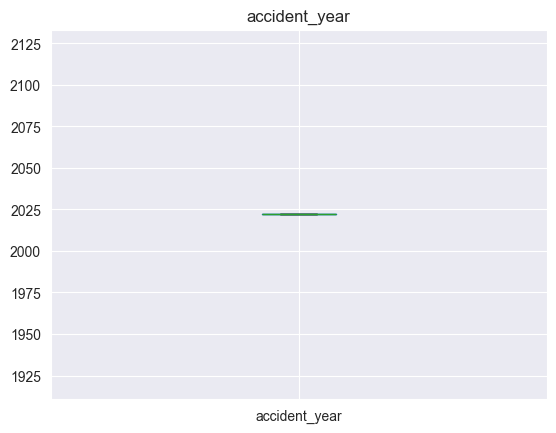

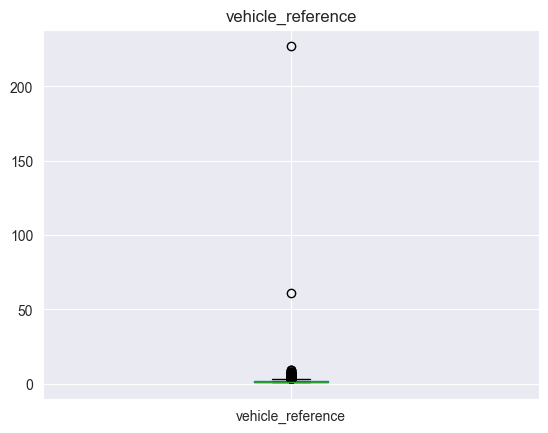

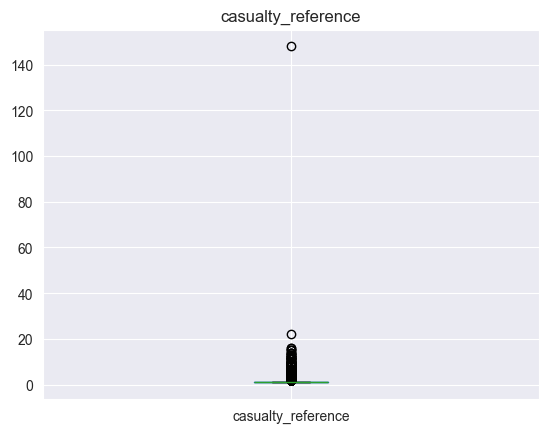

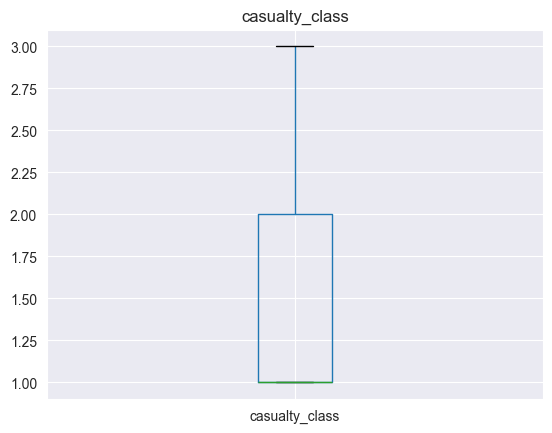

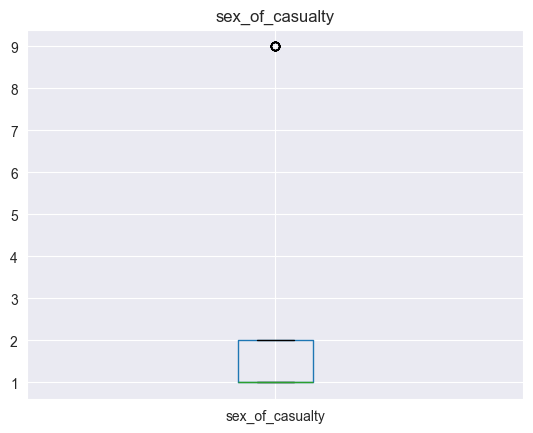

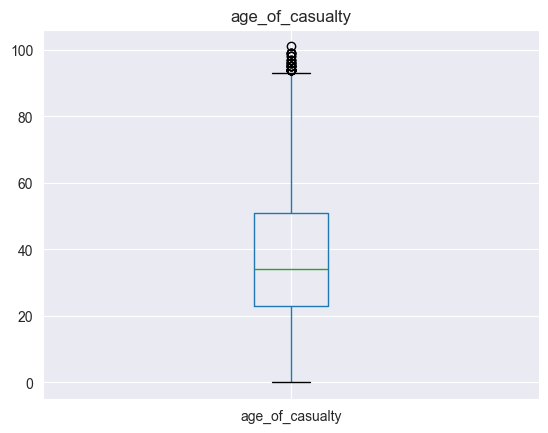

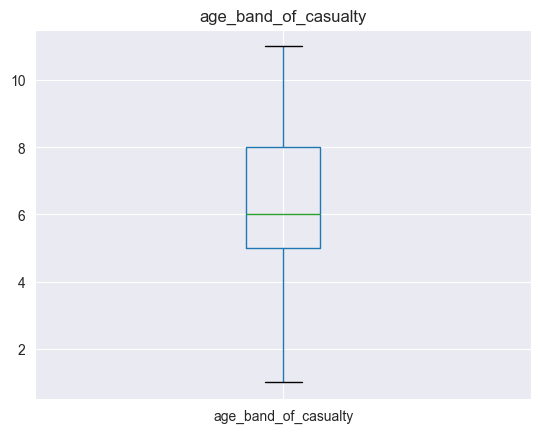

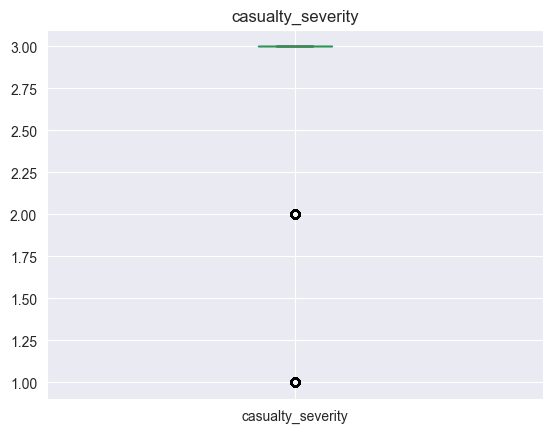

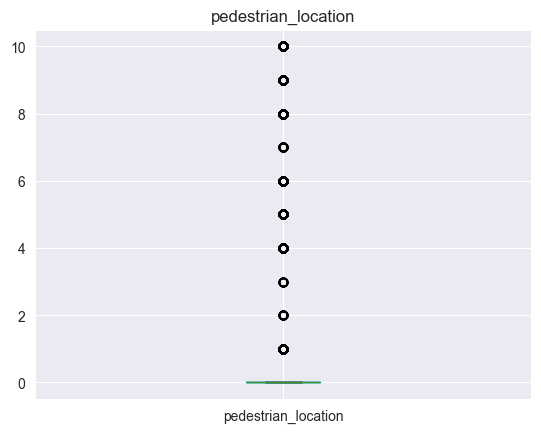

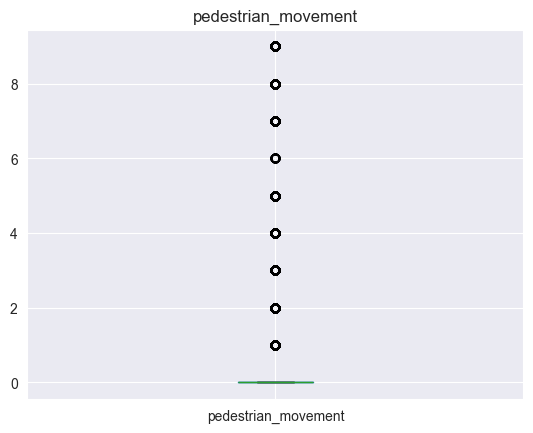

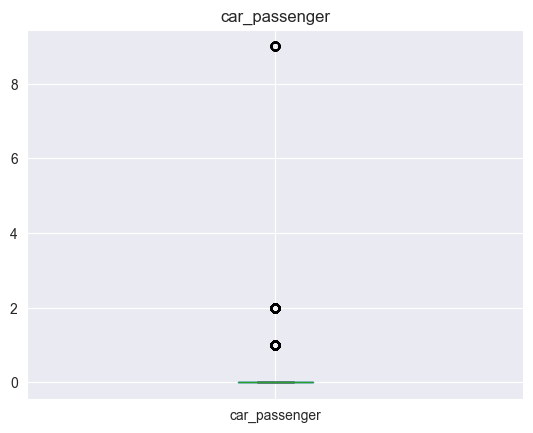

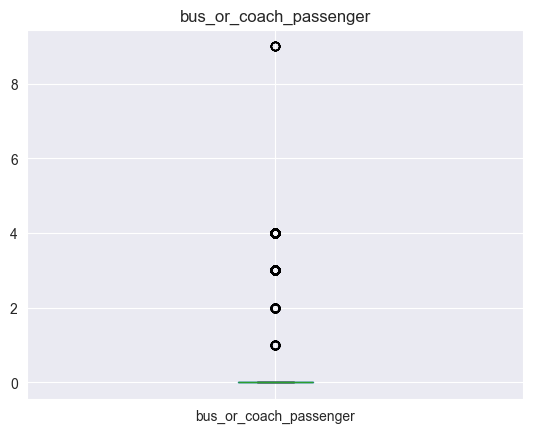

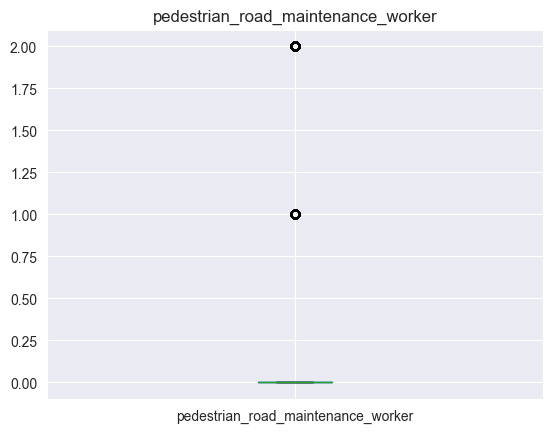

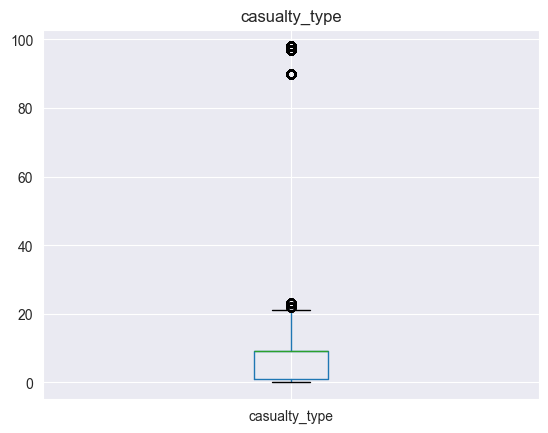

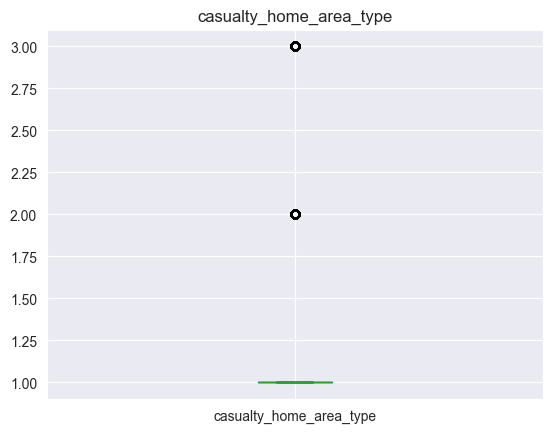

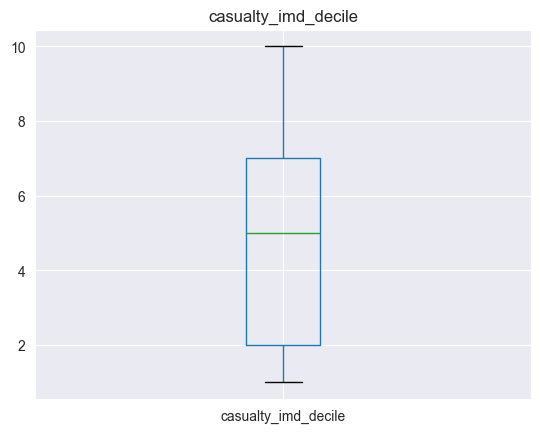

In [18]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
for column in numerical_columns:
    df.boxplot(column=column)
    plt.title(column)
    plt.show()

Check for outliers or inconsistencies For categorical columns

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    # Check unique values
    print(f"\nUnique values in {column}:")
    print(df[column].value_counts())

Calculate the range of diversity for each numerical column

In [ ]:
diversity_ranges = {}
for column in df.columns:
    if df[column].dtype in ['int64', 'float64']:  # Check if the column is numerical
        column_range = df[column].max() - df[column].min()
        diversity_ranges[column] = column_range + 1

# Print the range of diversity for each numerical column
for column, diversity_range in diversity_ranges.items():
    print(f"Range of diversity for '{column}': {diversity_range}")

# Descriptive Statistics

Summary statistics for numerical variables

In [15]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_summary = df[numerical_columns].describe()
print("Summary statistics for numerical variables:")
print(numerical_summary)

Summary statistics for numerical variables:
       accident_year  vehicle_reference  casualty_reference  casualty_class  \
count        61352.0       61352.000000        61352.000000    61352.000000   
mean          2022.0           1.450368            1.333779        1.482299   
std              0.0           1.109855            0.981507        0.735614   
min           2022.0           1.000000            1.000000        1.000000   
25%           2022.0           1.000000            1.000000        1.000000   
50%           2022.0           1.000000            1.000000        1.000000   
75%           2022.0           2.000000            1.000000        2.000000   
max           2022.0         227.000000          148.000000        3.000000   

       sex_of_casualty  age_of_casualty  age_band_of_casualty  \
count     60904.000000     60002.000000          60002.000000   
mean          1.386214        37.517866              6.452135   
std           0.496238        18.950720          

Frequency tables for categorical variables

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
    print(f"\nFrequency table for {column}:")
    print(df[column].value_counts())

# Exploratory Data Analysis (EDA)

Compare the distribution of casualty severity across different demographic groups

1. Gender vs. Casualty Severity

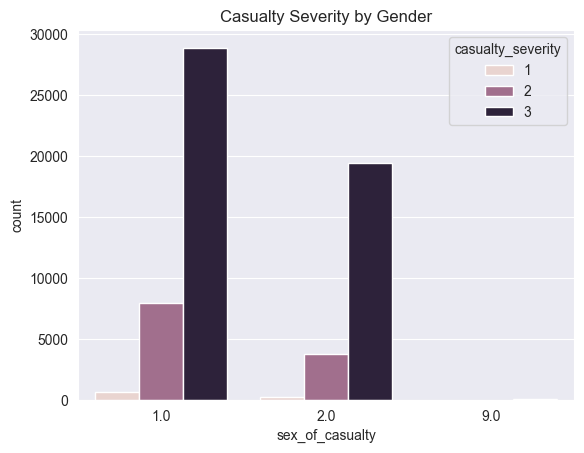

In [14]:
sns.countplot(x='sex_of_casualty', hue='casualty_severity', data=df)
plt.title('Casualty Severity by Gender')
plt.show()

2. Age Band vs. Casualty Severity

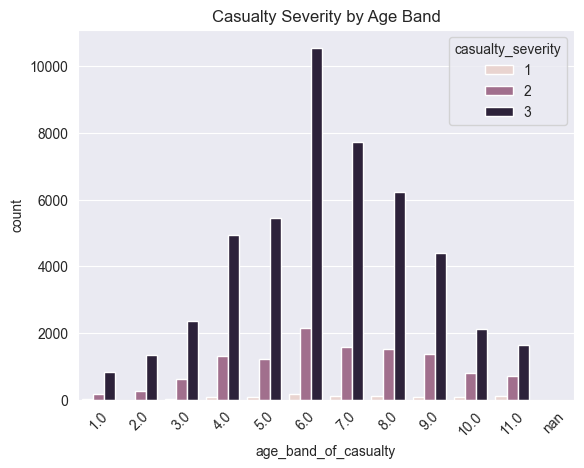

In [12]:
sns.countplot(x='age_band_of_casualty', hue='casualty_severity', data=df, order=sorted(df['age_band_of_casualty'].unique()))
plt.title('Casualty Severity by Age Band')
plt.xticks(rotation=45)
plt.show()

# Data Cleaning

In [31]:
df_cleaned = df.drop(columns=['accident_year', 'accident_reference', 'age_of_casualty', 'status'])
df_cleaned

,accident_index,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,2022070151244,2,1,1,2.0,8.0,3,0,0,0.0,0.0,0.0,9.0,1.0,9.0,E01033378
1,2022070152668,1,1,1,1.0,6.0,3,0,0,0.0,0.0,0.0,9.0,1.0,2.0,E01018551
2,2022070154696,1,1,1,2.0,9.0,3,0,0,0.0,0.0,0.0,9.0,1.0,10.0,E01006134
3,2022070154696,2,3,1,2.0,11.0,3,0,0,0.0,0.0,0.0,9.0,2.0,10.0,E01018724
4,2022070154696,3,2,1,1.0,9.0,3,0,0,0.0,0.0,0.0,9.0,3.0,7.0,W01000578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61347,2022461156711,1,1,3,2.0,9.0,3,10,9,0.0,0.0,0.0,0.0,1.0,10.0,E01024046
61348,2022461157243,1,1,3,1.0,3.0,2,5,9,0.0,0.0,0.0,0.0,NaN,NaN,NaN
61349,2022461157256,2,1,1,1.0,7.0,3,0,0,0.0,0.0,0.0,9.0,1.0,5.0,E01016034
61350,2022461157316,1,1,1,2.0,7.0,3,0,0,0.0,0.0,0.0,9.0,1.0,3.0,E01024497


In [34]:
df_cleaned.drop_duplicates(inplace=True)
# df_cleaned

In [30]:
# df_cleaned.dropna()

,accident_index,vehicle_reference,casualty_reference,casualty_class,sex_of_casualty,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile,lsoa_of_casualty
0,2022070151244,2,1,1,2.0,8.0,3,0,0,0.0,0.0,0.0,9.0,1.0,9.0,E01033378
1,2022070152668,1,1,1,1.0,6.0,3,0,0,0.0,0.0,0.0,9.0,1.0,2.0,E01018551
2,2022070154696,1,1,1,2.0,9.0,3,0,0,0.0,0.0,0.0,9.0,1.0,10.0,E01006134
3,2022070154696,2,3,1,2.0,11.0,3,0,0,0.0,0.0,0.0,9.0,2.0,10.0,E01018724
4,2022070154696,3,2,1,1.0,9.0,3,0,0,0.0,0.0,0.0,9.0,3.0,7.0,W01000578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61346,2022461156575,1,1,1,1.0,10.0,2,0,0,0.0,0.0,0.0,4.0,1.0,7.0,E01024707
61347,2022461156711,1,1,3,2.0,9.0,3,10,9,0.0,0.0,0.0,0.0,1.0,10.0,E01024046
61349,2022461157256,2,1,1,1.0,7.0,3,0,0,0.0,0.0,0.0,9.0,1.0,5.0,E01016034
61350,2022461157316,1,1,1,2.0,7.0,3,0,0,0.0,0.0,0.0,9.0,1.0,3.0,E01024497


In [11]:
#'age_band_of_casualty' equals 6
filtered_rows = df[df['age_band_of_casualty'] == 6]
print(filtered_rows['age_of_casualty'].value_counts())

age_of_casualty
30.0    1366
31.0    1360
29.0    1355
27.0    1315
26.0    1307
28.0    1298
32.0    1282
33.0    1257
35.0    1168
34.0    1164
Name: count, dtype: int64


# Statistical Analysis

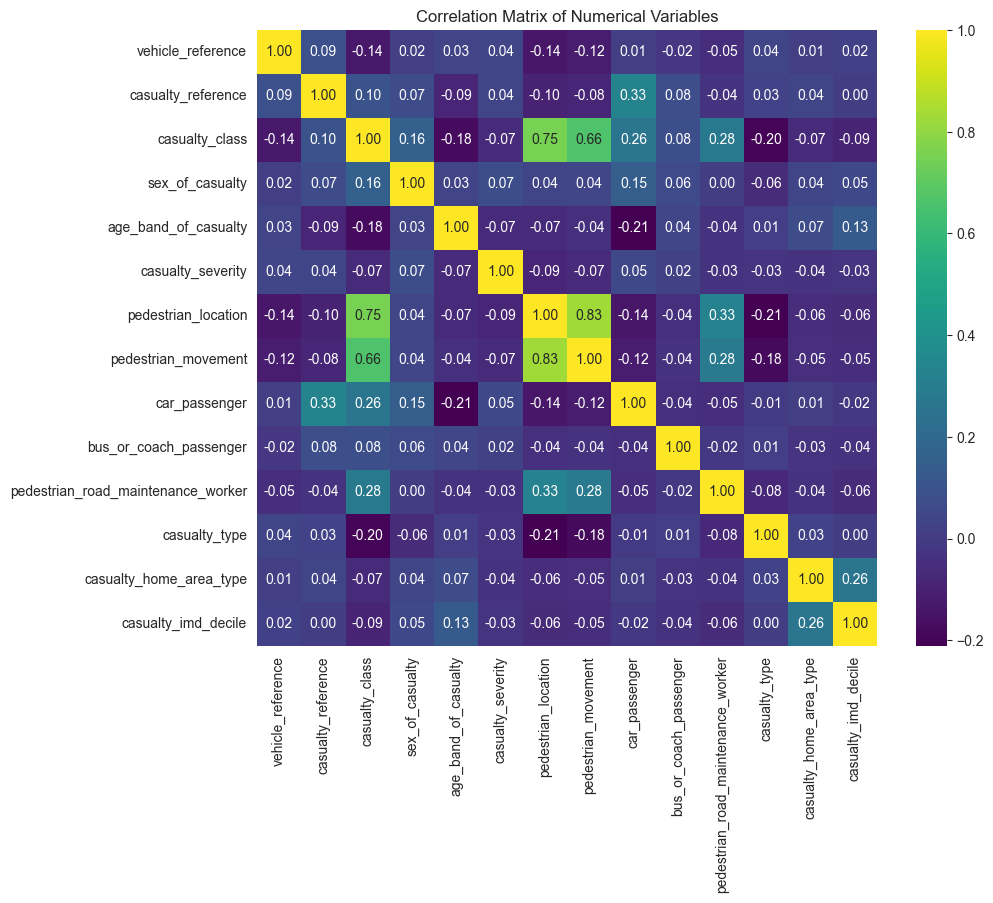

In [36]:
# Data preprocessing
df_numeric = df_cleaned.select_dtypes(include=['int64', 'float64'])
# Calculate correlation matrix
correlation_matrix = df_numeric.corr()

# Plot correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix of Numerical Variables')
plt.show()

In [8]:
# Example 1: Chi-square test of independence between Sex_of_Casualty and Casualty_Severity
chi2, p, _, _ = stats.chi2_contingency(pd.crosstab(df['sex_of_casualty'], df['casualty_severity']))
print("Chi-square test result for Sex_of_Casualty and Casualty_Severity:")
print("Chi-square value:", chi2)
print("p-value:", p)

# Example 2: T-test to compare mean Age_of_Casualty for different Casualty_Severity groups
serious_age = df[df['casualty_severity'] == 'serious']['age_of_casualty']
slight_age = df[df['casualty_severity'] == 'slight']['age_of_casualty']
t_stat, p_val = stats.ttest_ind(serious_age, slight_age, equal_var=False)
print("\nT-test result for Age_of_Casualty between serious and slight casualties:")
print("T-statistic:", t_stat)
print("p-value:", p_val)

# Example 3: ANOVA to compare mean Age_of_Casualty across different Age_Band_of_Casualty groups
anova_result = stats.f_oneway(
    df[df['age_band_of_casualty'] == 0]['age_of_casualty'],
    df[df['age_band_of_casualty'] == 1]['age_of_casualty'],
    df[df['age_band_of_casualty'] == 2]['age_of_casualty']
)
print("\nANOVA result for Age_of_Casualty across different age bands:")
print("F-statistic:", anova_result.statistic)
print("p-value:", anova_result.pvalue)


Chi-square test result for Sex_of_Casualty and Casualty_Severity:
Chi-square value: 320.19805513985995
p-value: 4.753009553581639e-68

T-test result for Age_of_Casualty between serious and slight casualties:
T-statistic: nan
p-value: nan

ANOVA result for Age_of_Casualty across different age bands:
F-statistic: nan
p-value: nan


C:\Users\ROG\AppData\Local\Temp\ipykernel_16484\3470420403.py:16: DegenerateDataWarning: at least one input has length 0
  anova_result = stats.f_oneway(


# Machine Learning

In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report


# Data preprocessing
# Drop irrelevant columns and handle missing values
df = df[['status', 'accident_year', 'casualty_class', 'sex_of_casualty', 'age_of_casualty', 'age_band_of_casualty',
         'pedestrian_location', 'pedestrian_movement', 'car_passenger', 'bus_or_coach_passenger',
         'pedestrian_road_maintenance_worker', 'casualty_type', 'casualty_home_area_type', 'casualty_imd_decile',
         'casualty_severity']]  # Select relevant columns
df = df.dropna()

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Split the data into features (X) and target variable (y)
X = df.drop(columns=['casualty_severity'])
y = df['casualty_severity']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model selection and training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.7622029839749493

Classification Report:
              precision    recall  f1-score   support

           1       0.00      0.00      0.00       140
           2       0.31      0.16      0.21      2054
           3       0.81      0.92      0.86      8664

    accuracy                           0.76     10858
   macro avg       0.37      0.36      0.36     10858
weighted avg       0.71      0.76      0.73     10858


After training the Random Forest Classifier and evaluating its performance, let's interpret the results:

1. **Accuracy**:
   - The accuracy score tells us how often the classifier is correct. In this case, the accuracy score indicates the proportion of correctly predicted casualty severities in the test set. For example, an accuracy of 0.75 means that the model correctly predicts 75% of the casualty severities in the test set.

2. **Classification Report**:
   - The classification report provides more detailed information about the model's performance, including precision, recall, and F1-score for each class (severity level).
   - Precision: It tells us what proportion of predicted positives (casualty severities) are actually positive. For example, a precision of 0.80 for the 'fatal' class means that 80% of the predicted 'fatal' casualties are correct.
   - Recall: It tells us what proportion of actual positives (casualty severities) were correctly predicted by the model. For example, a recall of 0.70 for the 'serious' class means that 70% of the actual 'serious' casualties were correctly predicted by the model.
   - F1-score: It is the harmonic mean of precision and recall and provides a balance between the two. It's useful when we have imbalanced classes. Higher F1-score indicates better model performance.
   - Support: It is the number of actual occurrences of each class in the test set.

Interpreting these results:
- The accuracy score gives us an overall idea of the model's performance, but it's essential to look at precision, recall, and F1-score for each class to understand how well the model performs for different severity levels.
- In this case, we can see that the model performs reasonably well, with accuracy around 0.75. However, there may be variations in performance across different severity levels. For instance, the model might be better at predicting slight casualties compared to fatal ones, as indicated by differences in precision, recall, and F1-score across severity levels.
- It's also important to consider the specific requirements and constraints of the problem when interpreting these results. For example, if correctly identifying fatal casualties is more critical than other severity levels, we might prioritize metrics like recall for the 'fatal' class, even if it comes at the cost of lower precision.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Load the dataset
df = pd.read_csv('road_accidents_dataset.csv')

# Data preprocessing
# Drop irrelevant columns and handle missing values
df = df[['status', 'accident_year', 'casualty_class', 'sex_of_casualty', 'age_of_casualty', 'age_band_of_casualty',
         'pedestrian_location', 'pedestrian_movement', 'car_passenger', 'bus_or_coach_passenger',
         'pedestrian_road_maintenance_worker', 'casualty_type', 'casualty_home_area_type', 'casualty_imd_decile',
         'casualty_severity']]  # Select relevant columns
df = df.dropna()

# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    label_encoders[col] = LabelEncoder()
    df[col] = label_encoders[col].fit_transform(df[col])

# Split the data into features (X) and target variable (y)
X = df.drop(columns=['casualty_severity'])
y = df['casualty_severity']

# Convert target variable to one-hot encoding
y = pd.get_dummies(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(y_train.shape[1], activation='softmax')
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_split=0.2, verbose=1)

# Evaluate the model
_, accuracy = model.evaluate(X_test, y_test)
print("Accuracy:", accuracy)

# Predictions
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Convert one-hot encoded labels back to original labels
y_test_classes = np.argmax(np.array(y_test), axis=1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_classes, y_pred_classes))
